original code found on https://pypi.org/project/drawSvg/

new code specific for our usecase

In [30]:
import drawSvg as draw
from drawSvg.widgets import DrawingWidget
from hyperbolic.poincare.shapes import *
from constructions import shift

delta=0.3
click_list=[]
lineStyle2 = dict(stroke_width=0.01, stroke='white', fill='none' #,stroke_dasharray='.02,.02'
                 )

# Create drawing
d = draw.Drawing(2.2, 2.2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))
g=draw.Group()
d.append(g)


def draw_delta_neigbourhood_twosides(points,delta):
    for i,x in enumerate(points):
        p1=Point.fromEuclid(x[0],x[1])
        g.draw(Circle.fromCenterRadius(p1, delta), fill='green',fill_opacity=1)
        for y in points[i+1:]:
            if i==0:
                p2=Point.fromEuclid(y[0],y[1])
                line = Line.fromPoints(*p1, *p2, segment=True)
                g.draw(line, hwidth=2*delta, fill='green',fill_opacity=1)
                
def draw_thin_triangle(points):
    for i,x in enumerate(points):
        for y in points[i+1:]:
            p1=Point.fromEuclid(x[0],x[1])
            p2=Point.fromEuclid(y[0],y[1])
            line=Line.fromPoints(*p1,*p2,segment=True)
            g.draw(line, **lineStyle2)

def draw_thick_line(points):
    for i,x in enumerate(points):
        for y in points[i+1:]:
            p1=Point.fromEuclid(x[0],x[1])
            p2=Point.fromEuclid(y[0],y[1])
            line=Line.fromPoints(*p1,*p2,segment=True)
            g.draw(line, hwidth=0.4,fill='red')
    
def redraw_Mousepoint(points):
    for i,x in enumerate(points):
        p=Point.fromEuclid(x[0],x[1])
        g.draw(Circle.fromCenterRadius(p,0.02),fill='white')
        


clicks=0
        
widget = DrawingWidget(d)
@widget.mousedown
def mousedown(widget, x, y, info):
        global clicks
        clicks+=1
        if (x**2 + y**2) ** 0.5 + 2e-10 < 1:
            if clicks<3:
                click_list.append((x, y))
            elif clicks==3:
                click_list.append((x,y))
                g.children.clear()
                draw_delta_neigbourhood_twosides(click_list,delta)
                draw_thin_triangle(click_list)
            else:
                g.children.clear()
                draw_delta_neigbourhood_twosides(shift(click_list,clicks),delta)
                draw_thin_triangle(shift(click_list,clicks))
        widget.refresh()
        
        
@widget.mousemove
def mousemove(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 2e-10 < 1:
        if len(click_list)<3:
            g.children.clear()
            draw_thin_triangle(click_list + [(x, y)])
            redraw_Mousepoint([(x,y)])
    widget.refresh()
    
draw_thick_line([(0.5,0.4),(-0.2,-0.3)])
widget


DrawingWidget()

Edge 0 is Ideal:  False
Edge 1 is Ideal:  False
Edge 2 is Ideal:  False
Tri is not Ideal
Tri is CCW
Tri is covered


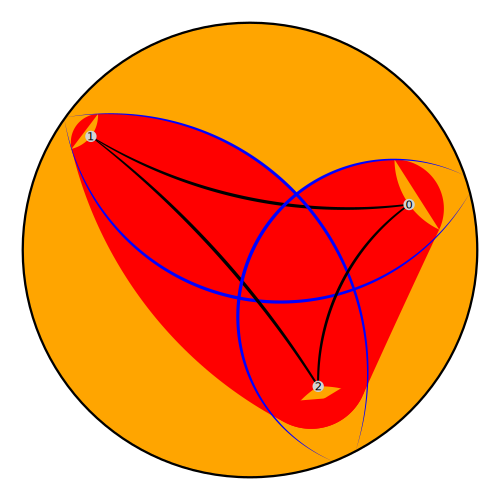

In [12]:
import math
import drawSvg as draw
from constructions import deltaLines_of_Line, shift
from deltaNeigbourhood import makeRoundCap
from hyperbolic.poincare.shapes import *
from Triangle import Triangle

delta=0.89

d = draw.Drawing(2.2, 2.2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))

p1=Point.fromEuclid(0.7,0.2)
p2=Point.fromEuclid(-0.7,0.5)
p3=Point.fromEuclid(0.3,-0.6)
#p1=Ideal(p1.theta)
#p2=Ideal(p2.theta)
#p3=Ideal(p3.theta)
PList=[p1,p2, p3]
#print(PList)

IdealPoints=[Ideal.fromDegree(i/3*360) for i in range(2)]

lineStyle1 = dict(fill='red', fill_opacity=1)

def deltaNeigbourhood(triangle, delta, edgeNumber=0):
    for i,l in enumerate(triangle.edges):
        if i==edgeNumber:
            continue
        else:
            d.draw(makeRoundCap(l, triangle.vertices[i], delta), **lineStyle1)
            d.draw(makeRoundCap(l, triangle.vertices[(i+1)%len(triangle.vertices)], delta), **lineStyle1)
            d.draw(l, hwidth=2*delta, **lineStyle1)

Tri=Triangle.fromVertices(PList)
#OffTri=Tri.offsetTriangle(delta)


"""
for p,l in zip(PList, SList):
    d.draw(l.makePerpendicular(*p), hwidth=0.03)
    cap = makeRoundCap(l, p,delta)
    d.draw(l, hwidth=2*delta, fill='blue')
    d.draw(cap, hwidth=0.03, fill='blue')

d.draw(deltaTri, stroke_width=0.02, stroke='black', fill='none')

for l in SList:
    d.draw(l, hwidth=0.03)
    d.draw(l.makeOffset(delta),hwidth=0.03, fill='green')
    d.draw(l.makeOffset(-delta),hwidth=0.03, fill='red')


for i,l in enumerate(SList):
    RestList = SList[:i] + SList[i+1:]
    for j,y in enumerate(RestList):
        for h in deltaLines_of_Line(l,delta):
            ips = y.intersectionsWithHcycle(h)
            for p in ips:
                d.draw(p, hradius=0.15, hwidth=0.02, fill='white', opacity=0.6)
                if is_on_Linesegment(*p, y):
                    d.draw(p, radius=0.01, fill='yellow')
"""
deltaNeigbourhood(Tri, delta, 0)

for i,l in enumerate(Tri.edges):
    print('Edge',i, 'is Ideal: ',Tri.isEdgeIdeal(i))
    d.draw(Tri.offsetEdge(i,delta), hwidth=0.03, fill='blue')
    d.draw(l, hwidth=0.03)

for i,v in enumerate(Tri.vertices):
    d.draw(v, radius=0.025, fill='lightgray')
    d.draw(draw.Text(str(i), 0.05, *v, center=0.7))

if Tri.isIdeal():
    print('Tri is Ideal')
else:
    print('Tri is not Ideal')
if Tri.isCCW():
    print('Tri is CCW')
else:
    print('Tri is CW')
if Tri.isCovered(delta):
    print('Tri is covered')
else:
    print('Tri is not covered')

d

-0.6
True False
[Point(-0.421, -0.049)] [Point(-0.393, -0.031)]
side 0 is not covered
-0.6
True False
[Point(-0.192, -0.225)] [Point(-0.163, -0.178)]
side 1 is covered
-0.6
True False
[Point(-0.483, -0.271)] [Point(-0.42, -0.306)]
side 2 is covered
Tri is CCW: False
Tri is covered: False


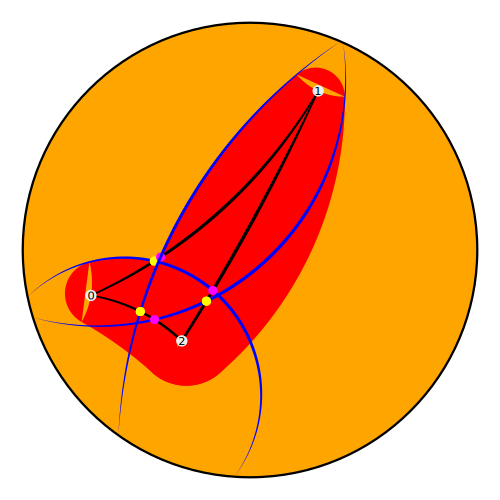

In [8]:
import drawSvg as draw
from constructions import deltaLines_of_Line, shift, isPointOnSegment
from deltaNeigbourhood import makeRoundCap
from hyperbolic.poincare.shapes import *
from Triangle import Triangle

delta=0.6

d = draw.Drawing(2.2, 2.2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))

p1=Point.fromEuclid(-0.7,-0.2)
p2=Point.fromEuclid(0.3,0.7)
p3=Point.fromEuclid(-0.3,-0.4)
Points=[p1,p2,p3]
#Points=[Point.fromPolarEuclid(0.75,deg=i/3*360) for i in range(3)]
IdealPoints=[Ideal(Points[i].theta) for i in range(3)]

lineStyle1 = dict(fill='red', fill_opacity=1)

def deltaNeigbourhood(triangle, delta, edgenumber=0):
    for i,l in enumerate(triangle.edges):
        if i==edgenumber:
            continue
        else:
            d.draw(makeRoundCap(l, triangle.vertices[i], delta), **lineStyle1)
            d.draw(makeRoundCap(l, triangle.vertices[(i+1)%len(triangle.vertices)], delta), **lineStyle1)
            d.draw(l, hwidth=2*delta, **lineStyle1)

Tri=Triangle.fromVertices(Points)
#OffTri=Tri.offsetTriangle(delta)       #for ideal this doesn't work

deltaNeigbourhood(Tri, delta)

for e in Tri.edges:
    d.draw(e, hwidth=0.03, fill='black')

for i,v in enumerate(Tri.vertices):
    d.draw(v, radius=0.025, fill='#eee')
    d.draw(draw.Text(str(i), 0.05, *v, center=0.7))


if (Tri.isCCW() and delta<=0) or (not Tri.isCCW() and delta>=0):
    delta = -delta
else:
    delta = delta
for i, edge in enumerate(Tri.edges):
    side1, side2 = Tri.edges[(i-1)%len(Tri.edges)], Tri.edges[(i+1)%len(Tri.edges)]
    if Tri.vertices[(i-1)%len(Tri.vertices)].isIdeal() and Tri.vertices[i].isIdeal():
        t1 = -1 
    else: t1 = 1
    if Tri.vertices[(i+1)%len(Tri.vertices)].isIdeal() and Tri.vertices[i].isIdeal():
        t2 = -1
    else: t2 = 1
    #d.draw(side1, fill='blue', hwidth=0.03)
    p1, p2 = [], []
    print(delta)
    ip1 = edge.intersectionsWithHcycle(Hypercycle.fromHypercycleOffset(side1, delta*t1))
    d.draw(Hypercycle.fromHypercycleOffset(side1, delta*t1), hwidth=0.03, fill='blue')
    for p in ip1:
        print(isPointOnSegment(edge, *p),p.isIdeal())
        if isPointOnSegment(edge, *p) and not p.isIdeal():      #to small delta for ideal triangles will return True instead of False
            d.draw(p, radius=0.02, fill='yellow')
            p1.append(p)
    ip2 = edge.intersectionsWithHcycle(Hypercycle.fromHypercycleOffset(side2, delta*t2))
    for p in ip2:
        if isPointOnSegment(edge, *p) and not p.isIdeal():      #to small delta for ideal triangles will return True instead of False
            p2.append(p)
    print(p1,p2)
    if len(p1) <= 0 or len(p2) <= 0:                            #one side delta is sourrounding the whole edge or problem above
        print('side',i,'is covered')
    elif len(p1) > 1 or len(p2) > 1:
        raise Exception('Intersection with edge %s is ambiguous'%i)
    else:
        ps1, ps2 = p1[0], p2[0]
        s1=Tri.vertices[i]
        d.draw(ps1, radius=0.02, fill='yellow')
        #d.draw(s1, radius=0.02, fill='yellow')
        d.draw(ps2,radius=0.02, fill='magenta')
        if isPointOnSegment(Line.fromPoints(*s1, *ps1, segment=True), *ps2):
            print('side',i,'is covered')
        else:
            print('side',i,'is not covered')


print('Tri is CCW:',Tri.isCCW())
print('Tri is covered:',Tri.isCovered(delta))
d